# .....Analysis On Type of Delivery using machine learning.....

# Data Information
A questionnaire of 62 items was produced after many meetings with specialists and extensive discussions, the last 20 of which were relevant to the respondent's recent pregnancy. 
Data was collected from respondents via face-to-face interviews and a completed questionnaire that included their pregnancy history. All women between the ages of 17-50 who attend ANC visits at various locations around Baramati are included in the study. The questionnaire was completed up by reproductive women who visited the well-known Mahila Hospital Baramati. The questionnaire uses the various variables such as number of ANC visits, education, household wealth, age of the respondent, occupation, number of deliveries etc.   
The pilot study was conducted on 30 reproductive women aged 18-45 years from Baramati (Dist.  Pune). The purpose of the pilot study was to find out the feasibility of the questionnaire. A total of 201 married women of reproductive age who had at least one child or had delivered the last child within 2-3 days from the date of data collection were interviewed using structured questionnaires. Data for this cross-sectional study were collected from Feb 2022 to March 2022.  


In [1]:
#Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
d=pd.read_csv("C:\\Users\\Intel\\Downloads\\Jayshri\\Edu_Pregnacy.csv")

In [4]:
d.head()

,SerialNumber,MotherAge,Mothereducation,Livingarea,FamilyType,Numberofmembersinthefamily,MotherOccupation,WorkingStatus,WorkingHours,FatherAge,...,MotherWeightbeforedelivery,Pregnancyperiodtillthedelivery,Childorder,Typeofdelivery,Newbornbabysex,NewbornbabyWeight,ANCvisitsduringpregnancyperiod,AnyHealthproblemsduringpregnancyperiod,UltraSoundExamination,diseaseproblem
0,13748,22,HSC,Rural,Joint,7,Housewife,Non-Working,NaN,24,...,47,279,2,Normal,Female,2.9,15,No,4,No any disease problem
1,13873,22,Undergraduate,Rural,Joint,12,Housewife,Non-Working,NaN,28,...,60,273,1,Normal,Male,3.1,18,Yes,4,Blood Pressure
2,13976,30,Post Graduate,Urban,Joint,5,Housewife,Non-Working,NaN,37,...,75,268,1,Normal,Female,3.2,9,No,5,No any disease problem
3,13919,22,Primary,Rural,Joint,21,Housewife,Non-Working,NaN,24,...,45,228,2,Normal,Female,2.6,3,No,1,No any disease problem
4,14000,24,HSC,Rural,Joint,9,Housewife,Non-Working,NaN,31,...,68,275,2,Normal,Male,4.2,8,No,5,No any disease problem


In [5]:
d.tail()

,SerialNumber,MotherAge,Mothereducation,Livingarea,FamilyType,Numberofmembersinthefamily,MotherOccupation,WorkingStatus,WorkingHours,FatherAge,...,MotherWeightbeforedelivery,Pregnancyperiodtillthedelivery,Childorder,Typeofdelivery,Newbornbabysex,NewbornbabyWeight,ANCvisitsduringpregnancyperiod,AnyHealthproblemsduringpregnancyperiod,UltraSoundExamination,diseaseproblem
196,15137,18,Primary,Urban,Nuclear,4,Housewife,Non-Working,NaN,25,...,32,274,2,Normal,Male,2.80,10,No,4,No any disease problem
197,15013,22,HSC,Rural,Joint,6,Housewife,Non-Working,NaN,25,...,42,262,3,Normal,Female,2.80,11,No,4,No any disease problem
198,15000,24,SSC,Urban,Joint,6,Housewife,Non-Working,NaN,24,...,50,275,1,Normal,Female,3.25,12,No,5,No any disease problem
199,14979,25,No Education,Urban,Nuclear,6,Farmer,Working,6.0,25,...,30,279,4,Normal,Male,3.30,2,No,1,No any disease problem
200,14991,19,No Education,Rural,Joint,6,Private Service,Non-Working,NaN,23,...,40,250,1,Normal,Male,2.80,12,No,3,No any disease problem


In [6]:
d.describe()

,SerialNumber,MotherAge,Numberofmembersinthefamily,WorkingHours,FatherAge,Marriageyear,MotherAgeatthemarriage,Numberofchildrensurvived,DistancefromhometoANCcenter,MotherHB,MotherSugar,MotherWeightbeforedelivery,Pregnancyperiodtillthedelivery,Childorder,NewbornbabyWeight,ANCvisitsduringpregnancyperiod,UltraSoundExamination
count,201.000000,201.000000,201.000000,43.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,15046.203980,22.885572,6.741294,6.581395,27.935323,3.228856,19.636816,1.402985,10.467164,11.412537,97.621095,55.676617,271.049751,1.781095,2.758308,10.696517,4.378109
std,9027.886308,3.749912,2.526408,2.629798,4.157018,2.854359,3.312467,0.593120,10.052110,1.308273,14.280740,10.377374,9.926606,0.872835,0.421525,4.592650,1.651157
min,10467.000000,18.000000,2.000000,1.000000,19.000000,1.000000,10.000000,0.000000,0.100000,7.100000,62.000000,30.000000,211.000000,1.000000,1.030000,2.000000,1.000000
25%,14123.000000,20.000000,5.000000,5.000000,25.000000,1.000000,18.000000,1.000000,3.000000,10.500000,90.000000,49.000000,268.000000,1.000000,2.500000,8.000000,3.000000
50%,14343.000000,22.000000,6.000000,7.000000,27.000000,2.000000,19.000000,1.000000,7.000000,11.500000,98.000000,55.000000,273.000000,2.000000,2.800000,10.000000,4.000000
75%,14844.000000,25.000000,8.000000,8.000000,30.000000,4.000000,21.000000,2.000000,15.000000,12.300000,103.000000,62.000000,278.000000,2.000000,3.000000,14.000000,5.000000
max,142217.000000,35.000000,21.000000,13.000000,42.000000,21.000000,29.000000,4.000000,50.000000,14.100000,180.000000,85.000000,295.000000,5.000000,4.200000,25.000000,12.000000


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SerialNumber                            201 non-null    int64  
 1   MotherAge                               201 non-null    int64  
 2   Mothereducation                         201 non-null    object 
 3   Livingarea                              201 non-null    object 
 4   FamilyType                              201 non-null    object 
 5   Numberofmembersinthefamily              201 non-null    int64  
 6   MotherOccupation                        201 non-null    object 
 7   WorkingStatus                           201 non-null    object 
 8   WorkingHours                            43 non-null     float64
 9   FatherAge                               201 non-null    int64  
 10  Marriageyear                            201 non-null    int64 

In [8]:
d.shape

(201, 30)

In [9]:
d.size

6030

In [10]:
d=d.drop(columns=["SerialNumber","WorkingHours","Numberofchildrensurvived","Knowledgeondangersignsofpregnancy",])

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   MotherAge                               201 non-null    int64  
 1   Mothereducation                         201 non-null    object 
 2   Livingarea                              201 non-null    object 
 3   FamilyType                              201 non-null    object 
 4   Numberofmembersinthefamily              201 non-null    int64  
 5   MotherOccupation                        201 non-null    object 
 6   WorkingStatus                           201 non-null    object 
 7   FatherAge                               201 non-null    int64  
 8   Marriageyear                            201 non-null    int64  
 9   MotherAgeatthemarriage                  201 non-null    int64  
 10  Numberofearlierpregnancies              201 non-null    object

In [12]:
d.head()

,MotherAge,Mothereducation,Livingarea,FamilyType,Numberofmembersinthefamily,MotherOccupation,WorkingStatus,FatherAge,Marriageyear,MotherAgeatthemarriage,...,MotherWeightbeforedelivery,Pregnancyperiodtillthedelivery,Childorder,Typeofdelivery,Newbornbabysex,NewbornbabyWeight,ANCvisitsduringpregnancyperiod,AnyHealthproblemsduringpregnancyperiod,UltraSoundExamination,diseaseproblem
0,22,HSC,Rural,Joint,7,Housewife,Non-Working,24,4,18,...,47,279,2,Normal,Female,2.9,15,No,4,No any disease problem
1,22,Undergraduate,Rural,Joint,12,Housewife,Non-Working,28,1,21,...,60,273,1,Normal,Male,3.1,18,Yes,4,Blood Pressure
2,30,Post Graduate,Urban,Joint,5,Housewife,Non-Working,37,6,24,...,75,268,1,Normal,Female,3.2,9,No,5,No any disease problem
3,22,Primary,Rural,Joint,21,Housewife,Non-Working,24,3,19,...,45,228,2,Normal,Female,2.6,3,No,1,No any disease problem
4,24,HSC,Rural,Joint,9,Housewife,Non-Working,31,5,19,...,68,275,2,Normal,Male,4.2,8,No,5,No any disease problem


In [13]:
d.shape

(201, 26)

In [14]:
d.columns

Index(['MotherAge', 'Mothereducation', 'Livingarea', 'FamilyType',
       'Numberofmembersinthefamily', 'MotherOccupation', 'WorkingStatus',
       'FatherAge', 'Marriageyear', 'MotherAgeatthemarriage',
       'Numberofearlierpregnancies', 'WasitaPlannedPregnancy',
       'DistancefromhometoANCcenter', 'MotherHB', 'MotherSugar',
       'MotherBloodGroup ', 'MotherWeightbeforedelivery',
       'Pregnancyperiodtillthedelivery', 'Childorder', 'Typeofdelivery',
       'Newbornbabysex', 'NewbornbabyWeight', 'ANCvisitsduringpregnancyperiod',
       'AnyHealthproblemsduringpregnancyperiod', 'UltraSoundExamination',
       'diseaseproblem'],
      dtype='object')

In [15]:
d.isnull().sum()

MotherAge                                 0
Mothereducation                           0
Livingarea                                0
FamilyType                                0
Numberofmembersinthefamily                0
MotherOccupation                          0
WorkingStatus                             0
FatherAge                                 0
Marriageyear                              0
MotherAgeatthemarriage                    0
Numberofearlierpregnancies                0
WasitaPlannedPregnancy                    0
DistancefromhometoANCcenter               0
MotherHB                                  0
MotherSugar                               0
MotherBloodGroup                          0
MotherWeightbeforedelivery                0
Pregnancyperiodtillthedelivery            0
Childorder                                0
Typeofdelivery                            0
Newbornbabysex                            0
NewbornbabyWeight                         0
ANCvisitsduringpregnancyperiod  

In [16]:
d.loc[(d.MotherAgeatthemarriage<18) &(d.Livingarea=="Rural") & (d.Typeofdelivery=="Scissor"),["MotherAgeatthemarriage","Livingarea","Typeofdelivery"]].value_counts()

MotherAgeatthemarriage  Livingarea  Typeofdelivery
16                      Rural       Scissor           4
17                      Rural       Scissor           3
10                      Rural       Scissor           1
11                      Rural       Scissor           1
dtype: int64

In [17]:
d.loc[(d.MotherAgeatthemarriage<18) &(d.Livingarea=="Urban") & (d.Typeofdelivery=="Scissor"),["MotherAgeatthemarriage","Livingarea","Typeofdelivery"]].value_counts()

MotherAgeatthemarriage  Livingarea  Typeofdelivery
17                      Urban       Scissor           4
dtype: int64

In [18]:
d.Typeofdelivery.value_counts()

Normal     135
Scissor     66
Name: Typeofdelivery, dtype: int64

### From above value count we can say that the data is unbalanced.

# Removing Outliers

<AxesSubplot:>

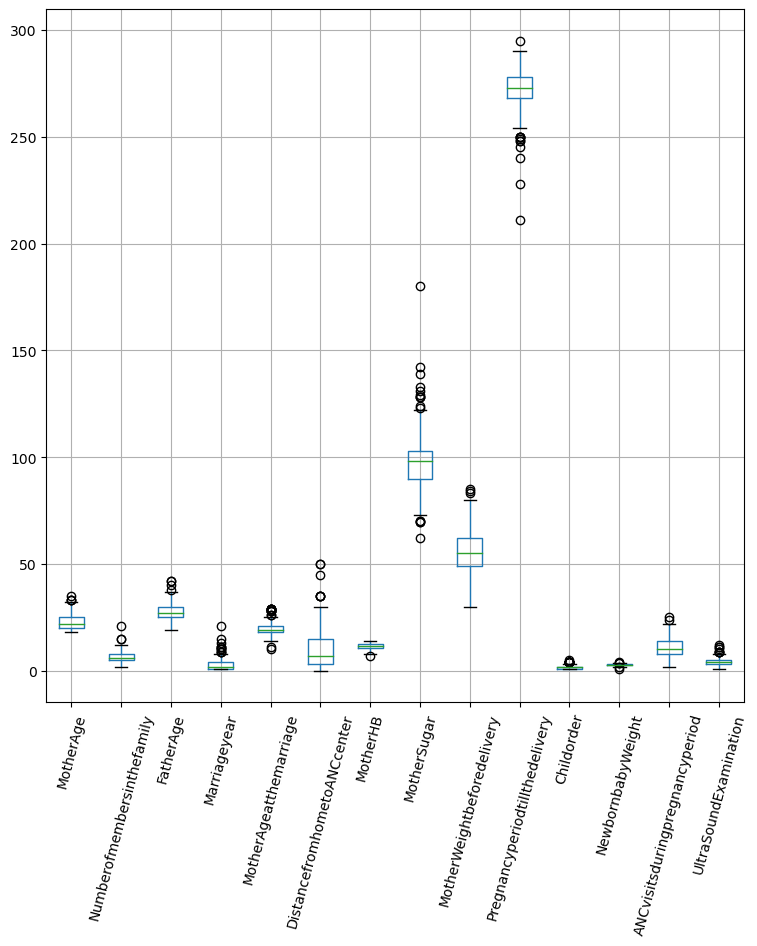

In [19]:
d.boxplot(rot=75,figsize=(9,9))

<AxesSubplot:>

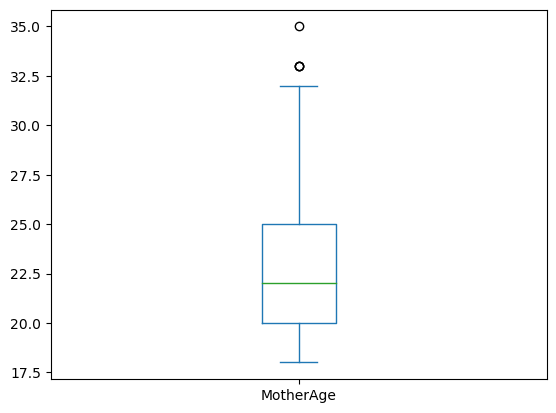

In [20]:
d.MotherAge.plot(kind="box")

<AxesSubplot:>

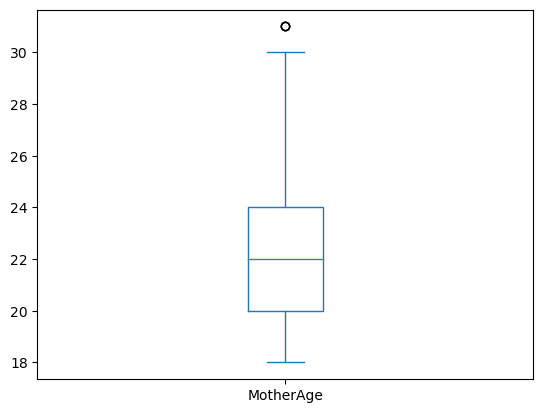

In [21]:
d=d[(d.MotherAge<32)]
d.MotherAge.plot(kind="box")

<AxesSubplot:>

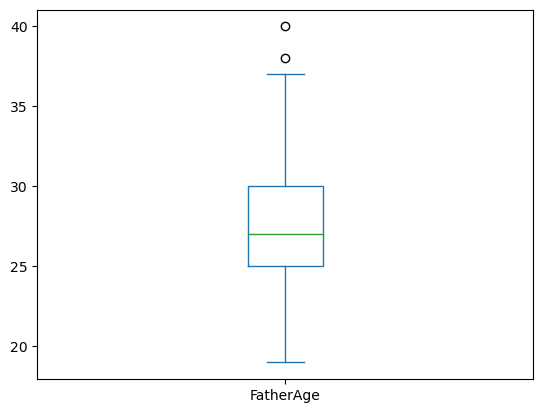

In [22]:
d.FatherAge.plot(kind="box")

<AxesSubplot:>

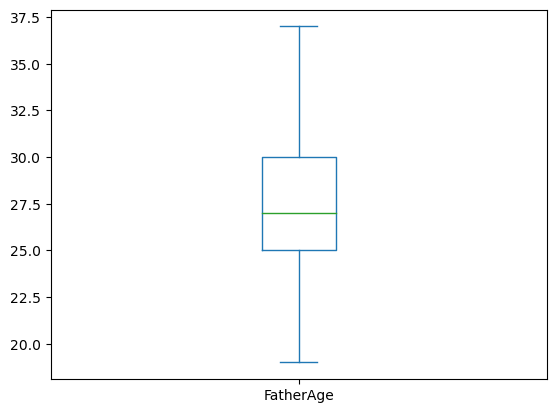

In [23]:
d=d[(d.FatherAge<38)]
d.FatherAge.plot(kind="box")

<AxesSubplot:>

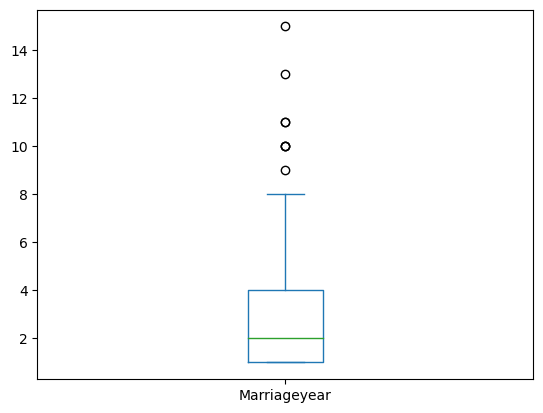

In [24]:
d.Marriageyear.plot(kind="box")

<AxesSubplot:>

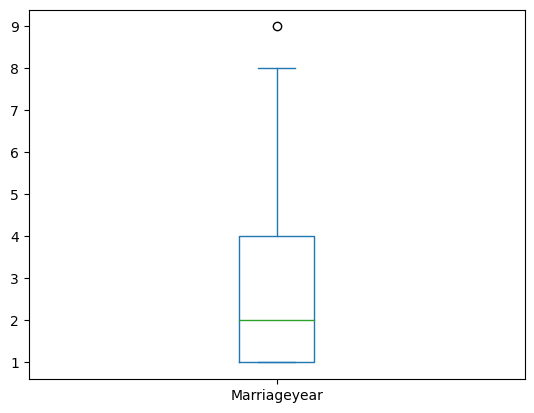

In [25]:
d=d[(d.Marriageyear<10)]
d.Marriageyear.plot(kind="box")

<AxesSubplot:>

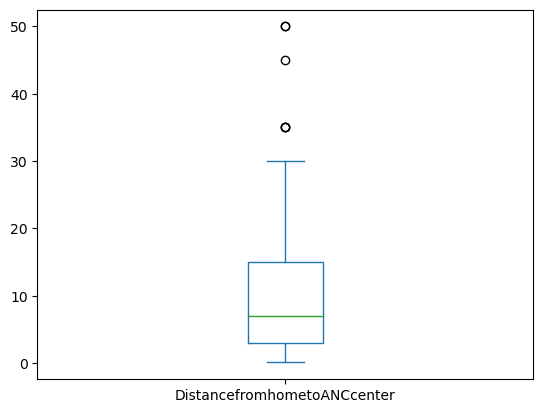

In [26]:
d.DistancefromhometoANCcenter.plot(kind="box")

<AxesSubplot:>

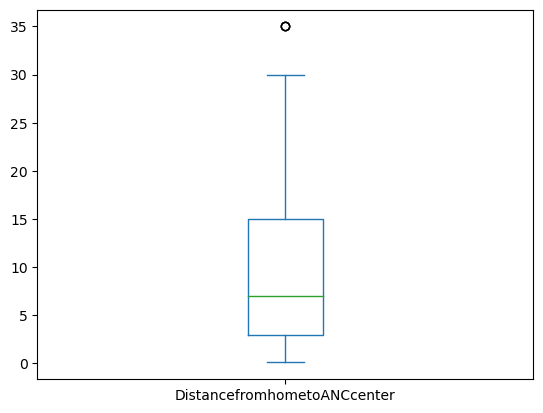

In [27]:
d=d[(d.DistancefromhometoANCcenter<40)]
d.DistancefromhometoANCcenter.plot(kind="box")

<AxesSubplot:>

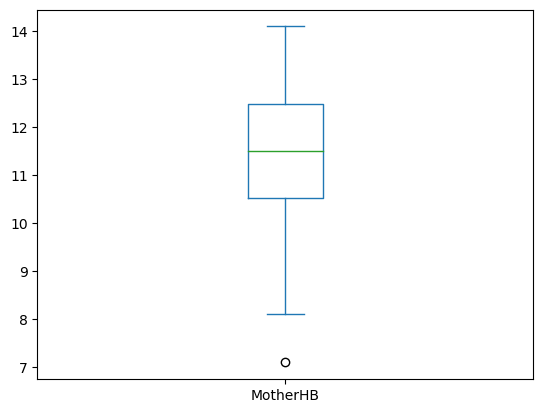

In [28]:
d.MotherHB.plot(kind="box")

<AxesSubplot:>

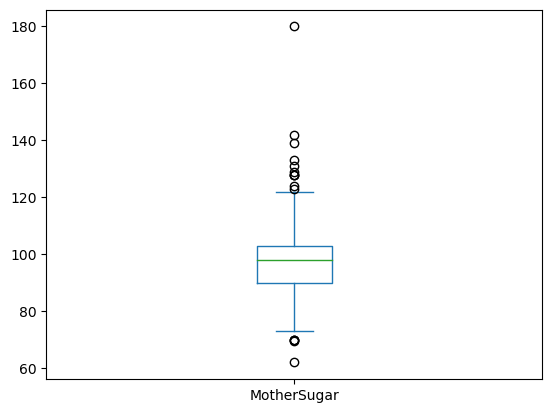

In [29]:
d.MotherSugar.plot(kind="box")

<AxesSubplot:>

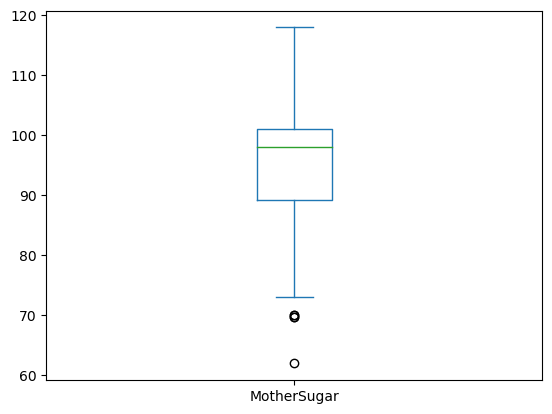

In [30]:
d=d[(d.MotherSugar<120)]
d.MotherSugar.plot(kind="box")

<AxesSubplot:>

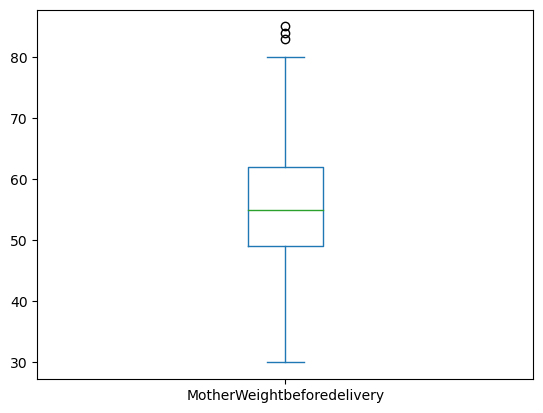

In [31]:
d.MotherWeightbeforedelivery.plot(kind="box")

<AxesSubplot:>

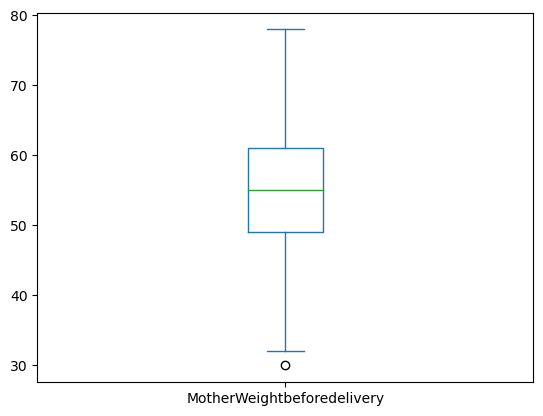

In [32]:
d=d[(d.MotherWeightbeforedelivery<80)]
d.MotherWeightbeforedelivery.plot(kind="box")

<AxesSubplot:>

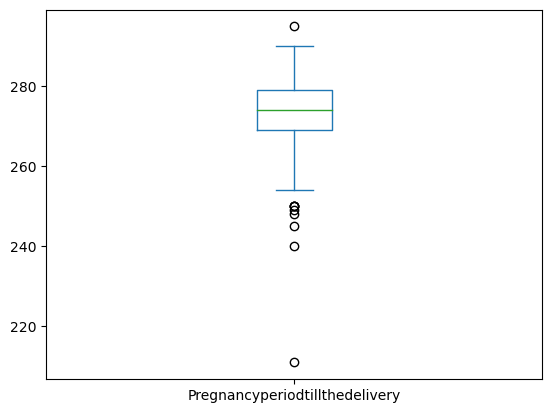

In [33]:
d.Pregnancyperiodtillthedelivery.plot(kind="box")

<AxesSubplot:>

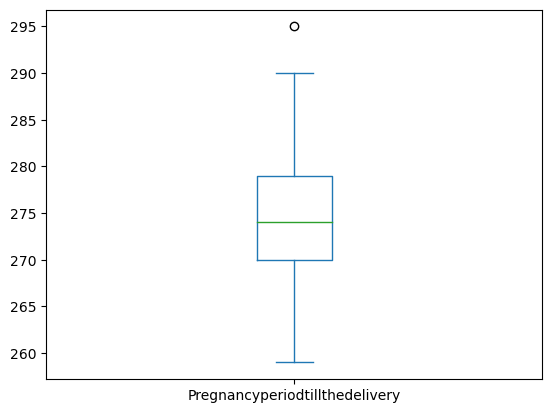

In [34]:
d=d[(d.Pregnancyperiodtillthedelivery>258)]
d.Pregnancyperiodtillthedelivery.plot(kind="box")

<AxesSubplot:>

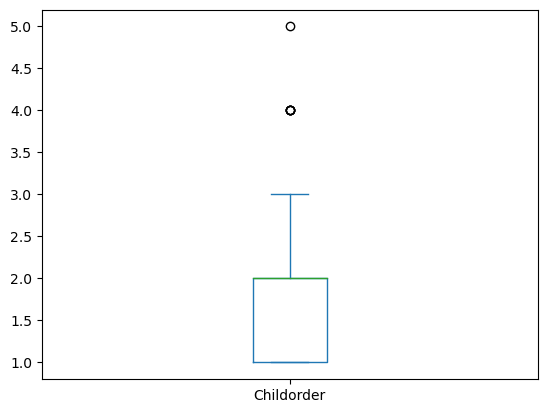

In [35]:
d.Childorder.plot(kind="box")

<AxesSubplot:>

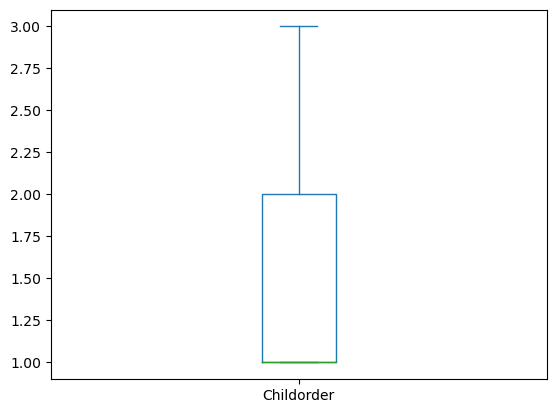

In [36]:
d=d[(d.Childorder<4.0)]
d.Childorder.plot(kind="box")

<AxesSubplot:>

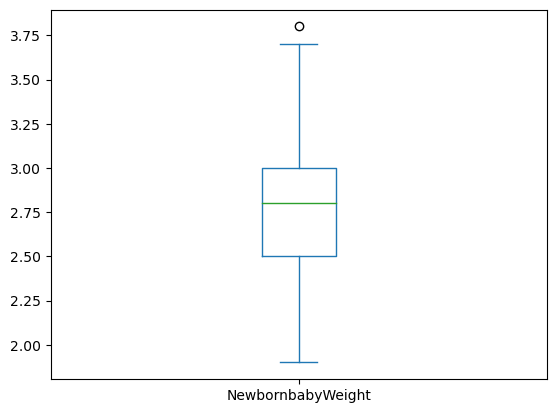

In [37]:
d.NewbornbabyWeight.plot(kind="box")

<AxesSubplot:>

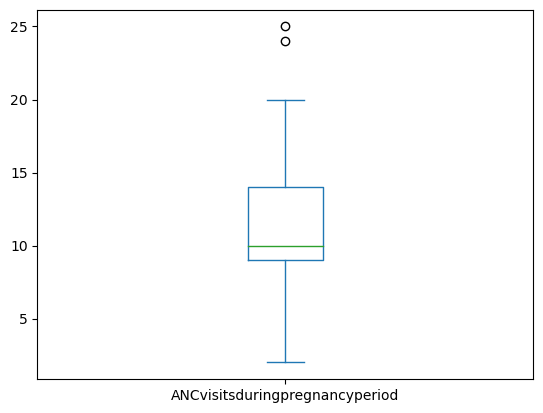

In [38]:
d.ANCvisitsduringpregnancyperiod.plot(kind="box")

<AxesSubplot:>

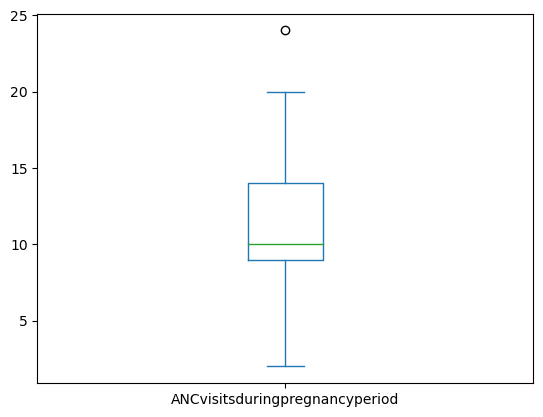

In [39]:
d=d[(d.ANCvisitsduringpregnancyperiod<25)]
d.ANCvisitsduringpregnancyperiod.plot(kind="box")

<AxesSubplot:>

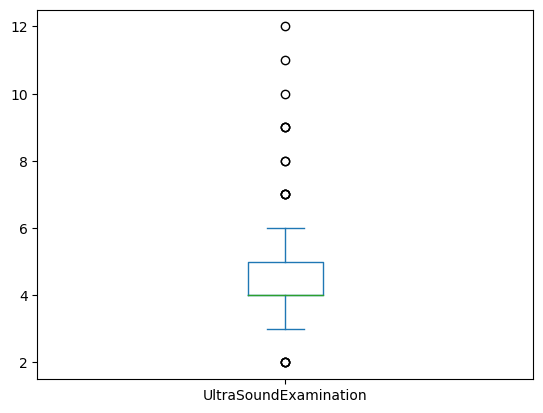

In [40]:
d.UltraSoundExamination.plot(kind="box")

<AxesSubplot:>

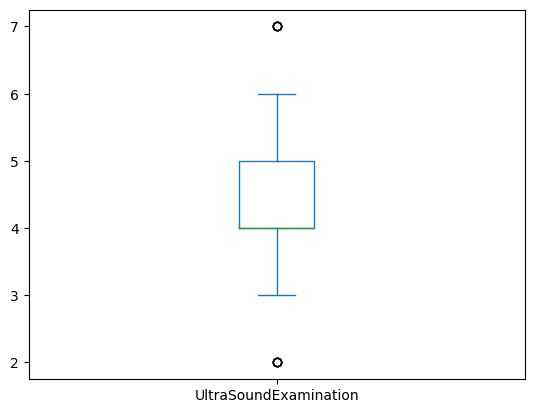

In [41]:
d=d[(d.UltraSoundExamination<8)]
d.UltraSoundExamination.plot(kind="box")

<AxesSubplot:>

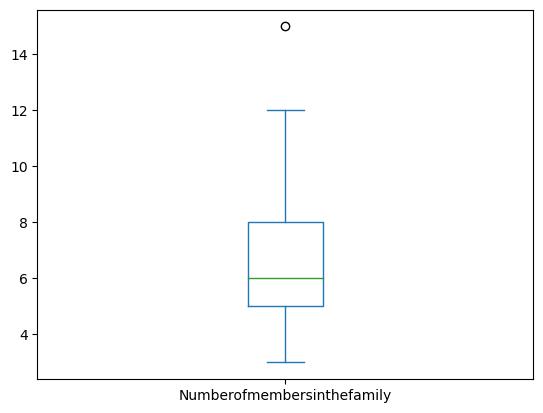

In [42]:
d.Numberofmembersinthefamily.plot(kind="box")

<AxesSubplot:>

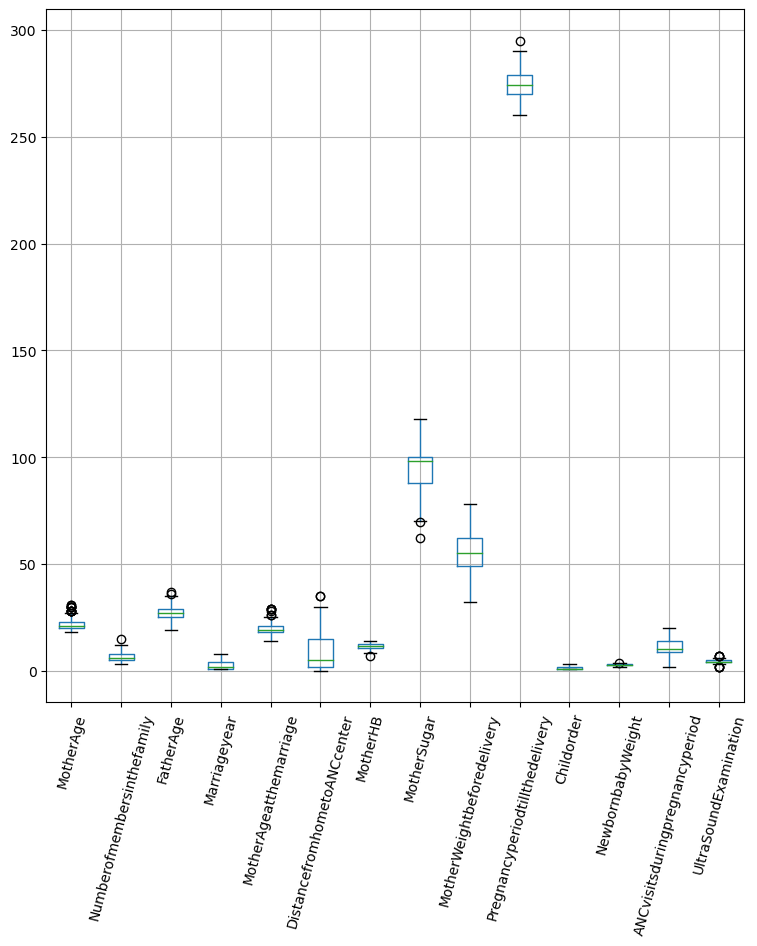

In [43]:
d.boxplot(rot=75,figsize=(9,9))

In [44]:
d.shape

(137, 26)

In [45]:
d.columns

Index(['MotherAge', 'Mothereducation', 'Livingarea', 'FamilyType',
       'Numberofmembersinthefamily', 'MotherOccupation', 'WorkingStatus',
       'FatherAge', 'Marriageyear', 'MotherAgeatthemarriage',
       'Numberofearlierpregnancies', 'WasitaPlannedPregnancy',
       'DistancefromhometoANCcenter', 'MotherHB', 'MotherSugar',
       'MotherBloodGroup ', 'MotherWeightbeforedelivery',
       'Pregnancyperiodtillthedelivery', 'Childorder', 'Typeofdelivery',
       'Newbornbabysex', 'NewbornbabyWeight', 'ANCvisitsduringpregnancyperiod',
       'AnyHealthproblemsduringpregnancyperiod', 'UltraSoundExamination',
       'diseaseproblem'],
      dtype='object')

# Visualization

In [46]:
d.Typeofdelivery.unique()

array(['Normal', 'Scissor'], dtype=object)

<AxesSubplot:xlabel='Typeofdelivery', ylabel='count'>

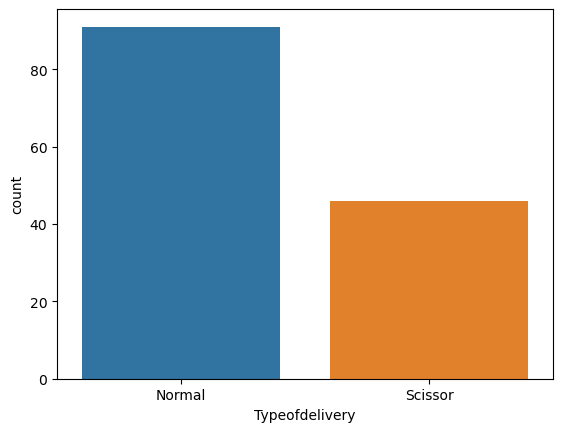

In [47]:
import seaborn as sns
sns.countplot(d["Typeofdelivery"])

<AxesSubplot:xlabel='Livingarea', ylabel='count'>

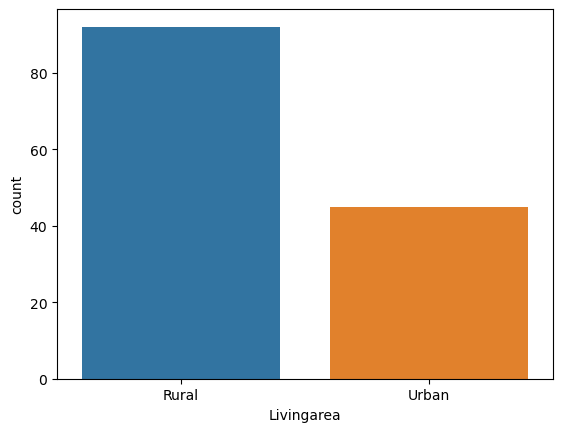

In [48]:
sns.countplot(d["Livingarea"])

In [49]:
lst=[]
for i in d.columns:
    if d[i].dtype=="O":
        lst.append(i)
        
for col in lst:
    print(col)
    print("Number of unique classes :",d[col].unique())
    print('\n')

Mothereducation
Number of unique classes : ['HSC' 'Undergraduate' 'Post Graduate' 'SSC' 'Graduate' 'No Education'
 'Other' 'Primary']


Livingarea
Number of unique classes : ['Rural' 'Urban']


FamilyType
Number of unique classes : ['Joint' 'Nuclear']


MotherOccupation
Number of unique classes : ['Housewife' 'Other' 'Farmer' 'Daily Wages' 'Private Service']


WorkingStatus
Number of unique classes : ['Non-Working' 'Working']


Numberofearlierpregnancies
Number of unique classes : ['2' '1' 'More than 2']


WasitaPlannedPregnancy
Number of unique classes : ['No' 'Yes']


MotherBloodGroup 
Number of unique classes : ['A positive' 'O positive' 'B positive' 'AB positive' 'B negative'
 'AB negative']


Typeofdelivery
Number of unique classes : ['Normal' 'Scissor']


Newbornbabysex
Number of unique classes : ['Female' 'Male']


AnyHealthproblemsduringpregnancyperiod
Number of unique classes : ['No' 'Yes']


diseaseproblem
Number of unique classes : ['No any disease problem' 'Blood Pressure' 

In [50]:
from sklearn import preprocessing

# Label Encoder

In [51]:
label_encoder = preprocessing.LabelEncoder()

In [52]:
d['Typeofdelivery']= label_encoder.fit_transform(d['Typeofdelivery'])
  
d['Typeofdelivery'].unique()

array([0, 1])

In [53]:
d['Mothereducation']= label_encoder.fit_transform(d['Mothereducation'])
  
d['Mothereducation'].unique()

array([1, 7, 4, 6, 0, 2, 3, 5])

In [54]:
d['Livingarea']= label_encoder.fit_transform(d['Livingarea'])
  
d['Livingarea'].unique()

array([0, 1])

In [55]:
d['FamilyType']= label_encoder.fit_transform(d['FamilyType'])
  
d['FamilyType'].unique()

array([0, 1])

In [56]:
d['MotherOccupation']= label_encoder.fit_transform(d['MotherOccupation'])
  
d['MotherOccupation'].unique()

array([2, 3, 1, 0, 4])

In [57]:
d['WorkingStatus']= label_encoder.fit_transform(d['WorkingStatus'])
  
d['WorkingStatus'].unique()

array([0, 1])

In [58]:
d['Numberofearlierpregnancies']= label_encoder.fit_transform(d['Numberofearlierpregnancies'])
  
d['Numberofearlierpregnancies'].unique()

array([1, 0, 2])

In [59]:
d['WasitaPlannedPregnancy']= label_encoder.fit_transform(d['WasitaPlannedPregnancy'])
  
d['WasitaPlannedPregnancy'].unique()

array([0, 1])

In [60]:
d['Newbornbabysex']= label_encoder.fit_transform(d['Newbornbabysex'])
  
d['Newbornbabysex'].unique()

array([0, 1])

In [61]:
d['AnyHealthproblemsduringpregnancyperiod']= label_encoder.fit_transform(d['AnyHealthproblemsduringpregnancyperiod'])
  
d['AnyHealthproblemsduringpregnancyperiod'].unique()

array([0, 1])

In [62]:
d['diseaseproblem']= label_encoder.fit_transform(d['diseaseproblem'])
  
d['diseaseproblem'].unique()

array([4, 1, 0, 3, 2, 5])

In [63]:
d['MotherBloodGroup ']= label_encoder.fit_transform(d['MotherBloodGroup '])
  
d['MotherBloodGroup '].unique()

array([0, 5, 4, 2, 3, 1])

In [64]:
d.head()

,MotherAge,Mothereducation,Livingarea,FamilyType,Numberofmembersinthefamily,MotherOccupation,WorkingStatus,FatherAge,Marriageyear,MotherAgeatthemarriage,...,MotherWeightbeforedelivery,Pregnancyperiodtillthedelivery,Childorder,Typeofdelivery,Newbornbabysex,NewbornbabyWeight,ANCvisitsduringpregnancyperiod,AnyHealthproblemsduringpregnancyperiod,UltraSoundExamination,diseaseproblem
0,22,1,0,0,7,2,0,24,4,18,...,47,279,2,0,0,2.9,15,0,4,4
1,22,7,0,0,12,2,0,28,1,21,...,60,273,1,0,1,3.1,18,1,4,1
2,30,4,1,0,5,2,0,37,6,24,...,75,268,1,0,0,3.2,9,0,5,4
5,22,1,0,1,6,2,0,30,4,18,...,55,265,2,1,1,2.3,9,0,4,4
8,23,6,0,0,6,2,0,35,4,19,...,68,288,2,1,1,3.3,20,0,4,4


In [65]:
d.Typeofdelivery.value_counts()

0    91
1    46
Name: Typeofdelivery, dtype: int64

In [66]:
x=d.drop("Typeofdelivery",axis=1)
y=d.Typeofdelivery

# Balancing The data using resample technique

In [67]:
from collections import Counter
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=30)
x_smk,y_smk=smk.fit_resample(x,y)
print("original dataset shape :",Counter(y))
print("Resample dataset shape:",Counter(y_smk))

original dataset shape : Counter({0: 91, 1: 46})
Resample dataset shape: Counter({0: 87, 1: 87})


# .........Model Building........

#  1. Logistic Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [69]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)

max_iteration=[]
for i in range(0,1000,20):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=random_no)
    model=LogisticRegression(max_iter=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    max_iteration.append(accuracy_score(y_test,y_pred))
    accuracy=max(max_iteration)
print("maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20,",accuracy score :",accuracy)

Random state number : 46 accuracy score : 0.9285714285714286
maximum iteration Number : 20 ,accuracy score : 0.9285714285714286


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=46)
log_model=LogisticRegression(max_iter=20)
log_model.fit(x_train,y_train)
y_pred_log=log_model.predict(x_test)
df=pd.DataFrame(y_pred_log,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_log),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_log),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_log),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_log))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
1               0
0               0
1               1
0               0
0               0 

 *************************************************************
Accuracy_score : 0.9285714285714286 

 *************************************************************
confusion_matrix : 
 [[22  0]
 [ 2  4]] 

 **************************************************************
precision_score : 
 1.0 

 **************************************************************
Recall_score : 0.6666666666666666


In [71]:
y_pred_log

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [72]:
y_test

69     1
81     0
64     1
166    0
84     0
42     0
68     1
18     0
34     0
157    0
75     0
153    0
127    0
46     0
143    0
19     0
117    0
57     1
21     0
101    0
195    0
30     0
52     1
150    0
120    0
129    1
152    0
175    0
Name: Typeofdelivery, dtype: int32

In [73]:
model.feature_names_in_

array(['MotherAge', 'Mothereducation', 'Livingarea', 'FamilyType',
       'Numberofmembersinthefamily', 'MotherOccupation', 'WorkingStatus',
       'FatherAge', 'Marriageyear', 'MotherAgeatthemarriage',
       'Numberofearlierpregnancies', 'WasitaPlannedPregnancy',
       'DistancefromhometoANCcenter', 'MotherHB', 'MotherSugar',
       'MotherBloodGroup ', 'MotherWeightbeforedelivery',
       'Pregnancyperiodtillthedelivery', 'Childorder', 'Newbornbabysex',
       'NewbornbabyWeight', 'ANCvisitsduringpregnancyperiod',
       'AnyHealthproblemsduringpregnancyperiod', 'UltraSoundExamination',
       'diseaseproblem'], dtype=object)

In [74]:
test_score = accuracy_score(y_test,log_model.predict(x_test)) * 100
train_score = accuracy_score(y_train,log_model.predict(x_train)) * 100


results_df_2 = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],  columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143


# 2. Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    Dt=DecisionTreeClassifier()
    Dt.fit(x_train,y_train)
    y_pred_Dt=Dt.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred_Dt))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)

maximum_depth=[]
for k in range(1,15):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=random_no)
    model=DecisionTreeClassifier(max_depth=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("maximum Depth :",(maximum_depth.index(max(maximum_depth)))+1,",accuracy score :",accuracy)

Random state number : 4 accuracy score : 0.8214285714285714
maximum Depth : 4 ,accuracy score : 0.8571428571428571


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

dt_model=DecisionTreeClassifier(max_depth=4)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
df=pd.DataFrame(y_pred_dt,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_dt),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_dt),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_dt),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_dt))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
1               1
0               1
0               0
0               0 

 *************************************************************
Accuracy_score : 0.8571428571428571 

 *************************************************************
confusion_matrix : 
 [[18  1]
 [ 3  6]] 

 **************************************************************
precision_score : 
 0.8571428571428571 

 **************************************************************
Recall_score : 0.6666666666666666


In [79]:
test_score = accuracy_score(y_test,dt_model.predict(x_test)) * 100
train_score = accuracy_score(y_train,dt_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["DecisionTreeClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286


In [80]:
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
d["Typeofdelivery"].unique()

array([0, 1])

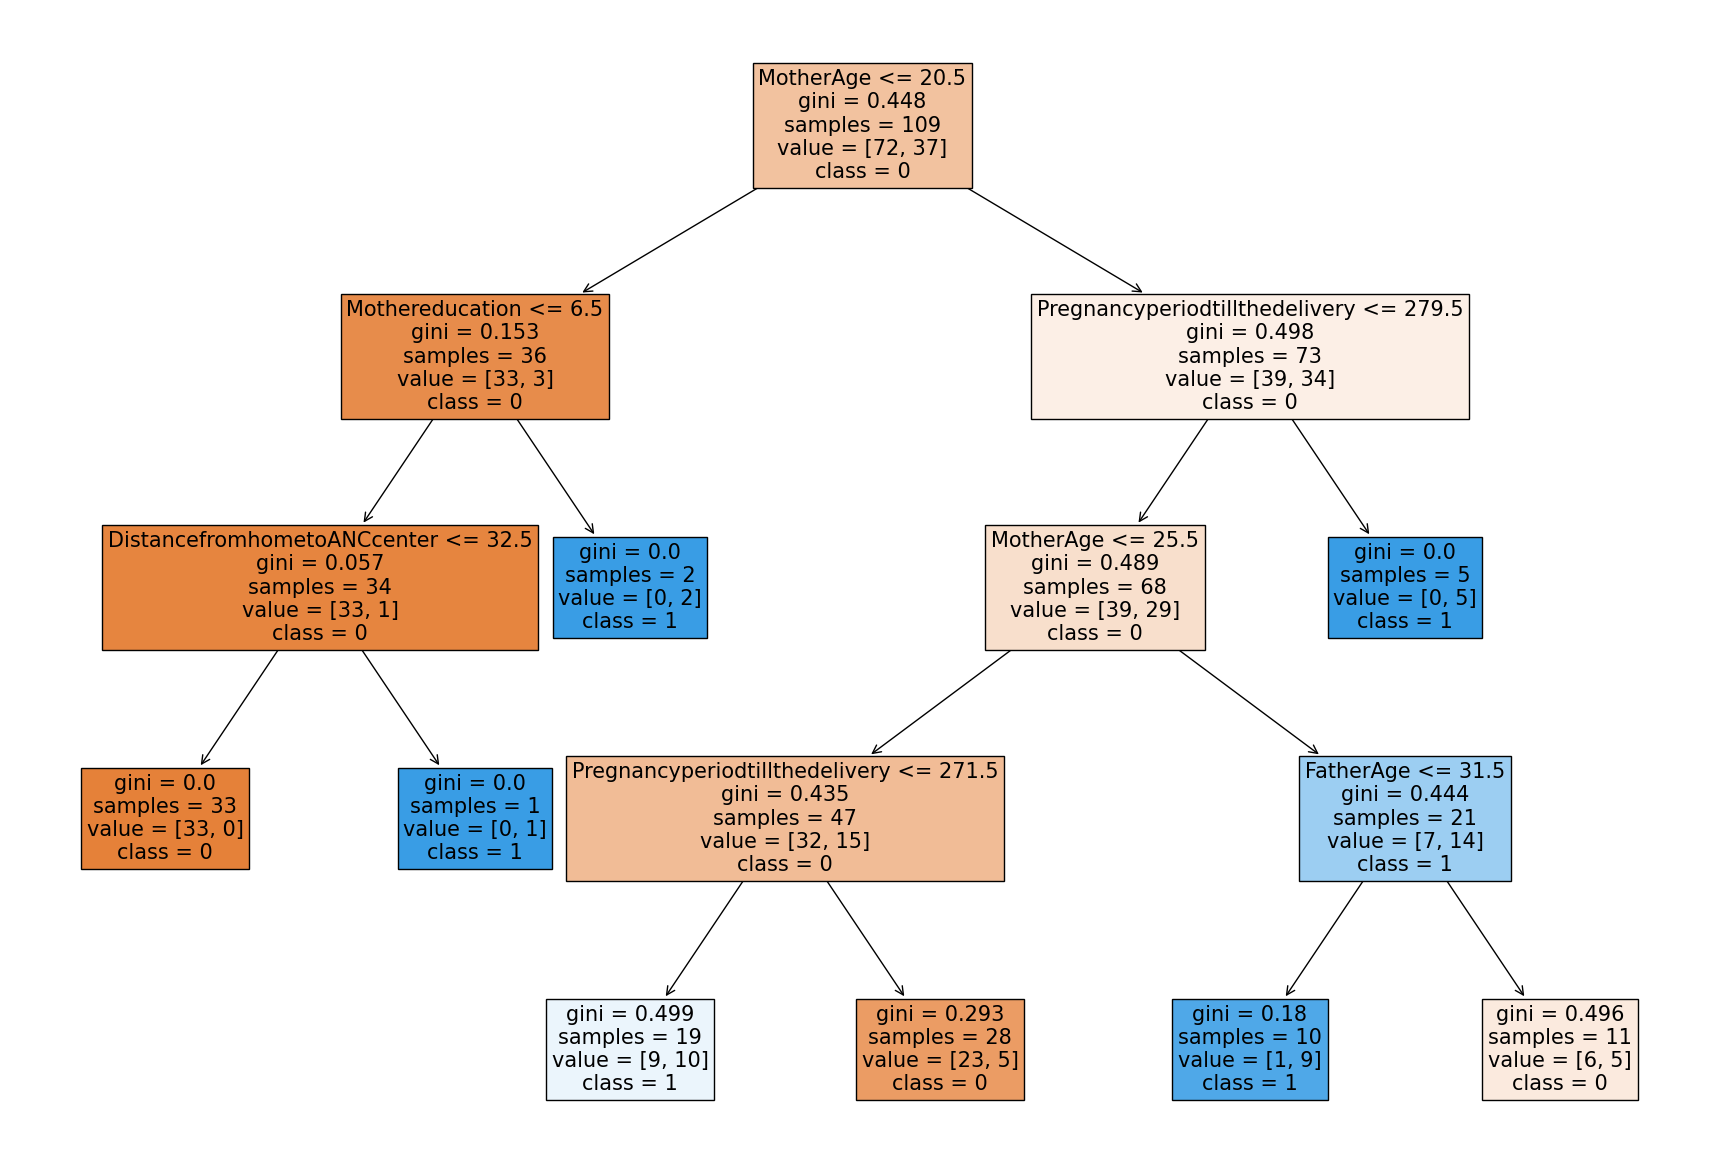

In [81]:
plt.figure(figsize=(22,15))
a=plot_tree(dt_model,fontsize=15,feature_names=x.columns,class_names=["0","1"],filled=True)
plt.show()

#  3. Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    R_model=RandomForestClassifier()
    R_model.fit(x_train,y_train)
    y_pred_R=R_model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred_R))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)

maximum_depth=[]
for k in range(2,20):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=random_no)
    model=RandomForestClassifier(max_depth=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    maximum_depth.append(accuracy_score(y_test,y_pred))
    accuracy=max(maximum_depth)
print("maximum Depth :",(maximum_depth.index(max(maximum_depth)))+2,",accuracy score :",accuracy)

Random state number : 17 accuracy score : 0.8571428571428571
maximum Depth : 2 ,accuracy score : 0.8571428571428571


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

R_model=RandomForestClassifier(max_depth=2)
R_model.fit(x_train,y_train)
y_pred_R=R_model.predict(x_test)
df=pd.DataFrame(y_pred_R,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_R),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_R),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_R),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_R))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
0               0
0               0
0               0
0               0 

 *************************************************************
Accuracy_score : 0.8214285714285714 

 *************************************************************
confusion_matrix : 
 [[23  2]
 [ 3  0]] 

 **************************************************************
precision_score : 
 0.0 

 **************************************************************
Recall_score : 0.0


In [85]:
test_score = accuracy_score(y_test,R_model.predict(x_test)) * 100
train_score = accuracy_score(y_train,R_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["RandomForestClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286
2,RandomForestClassifier,77.064220,82.142857


# 4. KNeighbours Algorithm

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
Random_state=[]
for j in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=j)
    knn_model=KNeighborsClassifier()
    knn_model.fit(x_train,y_train)
    y_pred_knn=knn_model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred_knn))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)

K_Neighbours=[]
for k in range(5,50,2):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=random_no)
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    K_Neighbours.append(accuracy_score(y_test,y_pred))
    accuracy=max(K_Neighbours)
print("maximum K_Neighbours :",(K_Neighbours.index(max(K_Neighbours)))*2+5,",accuracy score :",accuracy)

Random state number : 13 accuracy score : 0.7857142857142857
maximum K_Neighbours : 9 ,accuracy score : 0.8214285714285714


Text(0.5, 1.0, 'K Neighbours Classifier for different K values')

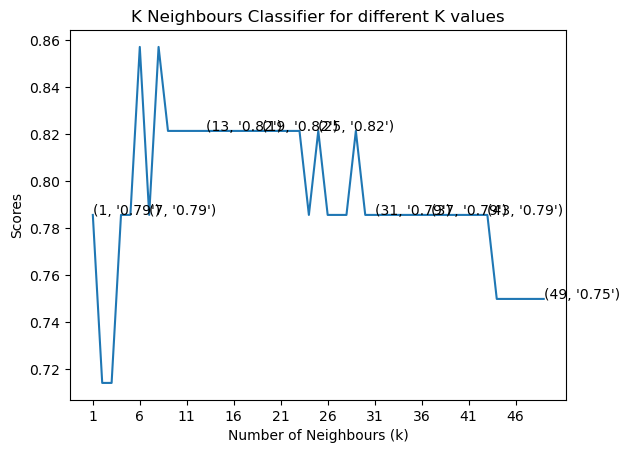

In [88]:
## Graph code for KNN
knn_scores=[]
for k in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train , y_train)
    y_prediction=knn.predict(x_test)
    knn_scores.append(accuracy_score(y_test,y_prediction))
    
plt.plot([k for k in range(1,50)],knn_scores)
for i in range(1,50,6):
    plt.text(i,knn_scores[i-1],(i,"%.2f"%knn_scores[i-1]))
plt.xticks([i for i in range(1,50,5)])
plt.xlabel("Number of Neighbours (k)")
plt.ylabel("Scores")
plt.title("K Neighbours Classifier for different K values")

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)

knn_model=KNeighborsClassifier(n_neighbors=9)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
df=pd.DataFrame(y_pred_knn,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_knn),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_knn),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_knn),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_knn))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
0               0
0               0
0               0
0               0 

 *************************************************************
Accuracy_score : 0.8214285714285714 

 *************************************************************
confusion_matrix : 
 [[20  1]
 [ 4  3]] 

 **************************************************************
precision_score : 
 0.75 

 **************************************************************
Recall_score : 0.42857142857142855


In [90]:
test_score = accuracy_score(y_test,knn_model.predict(x_test)) * 100
train_score = accuracy_score(y_train,knn_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["KNeighborsClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286
2,RandomForestClassifier,77.064220,82.142857
3,KNeighborsClassifier,66.972477,82.142857


# 5. Naive Bayes Algorithm

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    model=GaussianNB()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)


Random state number : 17 accuracy score : 0.8214285714285714


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
y_pred_NB=NB_model.predict(x_test)
df=pd.DataFrame(y_pred_NB,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_NB),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_NB),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_NB),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_NB))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               1
0               1
0               0
0               0
0               0 

 *************************************************************
Accuracy_score : 0.8214285714285714 

 *************************************************************
confusion_matrix : 
 [[21  4]
 [ 1  2]] 

 **************************************************************
precision_score : 
 0.3333333333333333 

 **************************************************************
Recall_score : 0.6666666666666666


In [94]:
test_score = accuracy_score(y_test, NB_model.predict(x_test)) * 100
train_score = accuracy_score(y_train,NB_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Naive_bayes", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286
2,RandomForestClassifier,77.064220,82.142857
3,KNeighborsClassifier,66.972477,82.142857
4,Naive_bayes,76.146789,82.142857


# 6. Support Vector Machine

In [95]:
from sklearn.svm import SVC

In [96]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    svm_model=SVC()
    svm_model.fit(x_train,y_train)
    y_pred_svm=svm_model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred_svm))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)


Random state number : 17 accuracy score : 0.8928571428571429


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=17)

model=SVC()
model.fit(x_train,y_train)
y_pred_svm=model.predict(x_test)
df=pd.DataFrame(y_pred_svm,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred_svm),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred_svm),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred_svm),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred_svm))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
0               0
0               0
0               0
0               0 

 *************************************************************
Accuracy_score : 0.8928571428571429 

 *************************************************************
confusion_matrix : 
 [[25  0]
 [ 3  0]] 

 **************************************************************
precision_score : 
 0.0 

 **************************************************************
Recall_score : 0.0


In [98]:
test_score = accuracy_score(y_test, model.predict(x_test)) * 100
train_score = accuracy_score(y_train,model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support vector classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286
2,RandomForestClassifier,77.064220,82.142857
3,KNeighborsClassifier,66.972477,82.142857
4,Naive_bayes,76.146789,82.142857
5,Support vector classifier,60.550459,89.285714


# 7. Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
Random_state=[]
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    model=GradientBoostingClassifier()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    Random_state.append(accuracy_score(y_test,y_pred))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)


Random state number : 52 accuracy score : 0.8214285714285714


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

GB_model=GradientBoostingClassifier()
GB_model.fit(x_train,y_train)
y_pred=GB_model.predict(x_test)
df=pd.DataFrame(y_pred,y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(y_test,y_pred),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(y_test,y_pred),"\n\n **************************************************************")
print("precision_score : \n",precision_score(y_test,y_pred),"\n\n **************************************************************")
print("Recall_score :",recall_score(y_test,y_pred))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
0               0
1               1
1               0
1               1 

 *************************************************************
Accuracy_score : 0.8214285714285714 

 *************************************************************
confusion_matrix : 
 [[20  2]
 [ 3  3]] 

 **************************************************************
precision_score : 
 0.6 

 **************************************************************
Recall_score : 0.5


In [102]:
test_score = accuracy_score(y_test, GB_model.predict(x_test)) * 100
train_score = accuracy_score(y_train, GB_model.predict(x_train)) * 100

results_df_2 = pd.DataFrame(data=[["GBoost Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,68.807339,92.857143
1,DecisionTreeClassifier,81.651376,85.714286
2,RandomForestClassifier,77.064220,82.142857
3,KNeighborsClassifier,66.972477,82.142857
4,Naive_bayes,76.146789,82.142857
5,Support vector classifier,60.550459,89.285714
6,GBoost Classifier,100.000000,82.142857


# Conclusion

### From above dataframe Logistic Regression gives highest accuracy (92.8571%) also their precision (1.0%) and recall (66.66%) are highest as compare to other algorithms.
### So we use Logistic Regression algorithm for this dataset.

# Find Important Features using Logistic Regression 

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
importances = pd.DataFrame(data={'Attribute': x_train.columns,'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

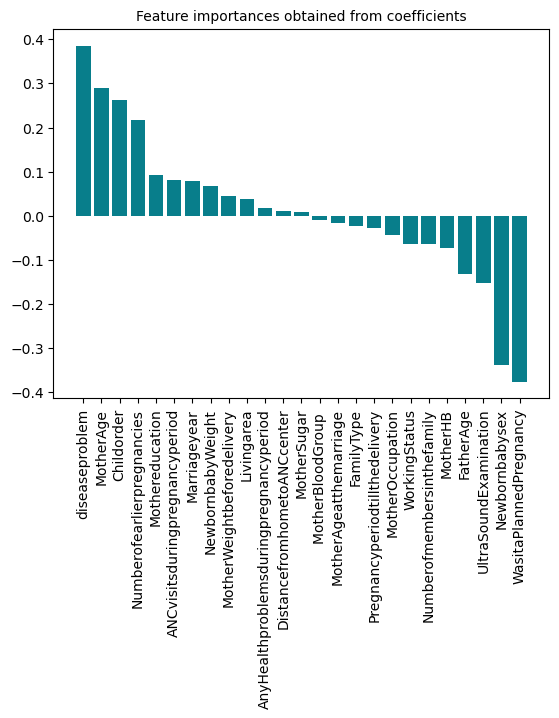

In [105]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical',)
plt.show()


In [106]:
X=d[['diseaseproblem','MotherAge','Childorder','Numberofearlierpregnancies','Mothereducation','ANCvisitsduringpregnancyperiod','Marriageyear','NewbornbabyWeight','MotherWeightbeforedelivery','Livingarea']]
Y=d.Typeofdelivery

In [107]:
d.columns

Index(['MotherAge', 'Mothereducation', 'Livingarea', 'FamilyType',
       'Numberofmembersinthefamily', 'MotherOccupation', 'WorkingStatus',
       'FatherAge', 'Marriageyear', 'MotherAgeatthemarriage',
       'Numberofearlierpregnancies', 'WasitaPlannedPregnancy',
       'DistancefromhometoANCcenter', 'MotherHB', 'MotherSugar',
       'MotherBloodGroup ', 'MotherWeightbeforedelivery',
       'Pregnancyperiodtillthedelivery', 'Childorder', 'Typeofdelivery',
       'Newbornbabysex', 'NewbornbabyWeight', 'ANCvisitsduringpregnancyperiod',
       'AnyHealthproblemsduringpregnancyperiod', 'UltraSoundExamination',
       'diseaseproblem'],
      dtype='object')

In [108]:
Random_state=[]
for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    l_model=LogisticRegression()
    l_model.fit(X_train,Y_train)
    Y_pred=l_model.predict(X_test)
    Random_state.append(accuracy_score(Y_test,Y_pred))
    random_no=(Random_state.index(max(Random_state)))+1
    accuracy=max(Random_state)
print("Random state number :",random_no,"accuracy score :",accuracy)

max_iteration=[]
for i in range(0,1000,20):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=i)
    model=LogisticRegression(max_iter=i)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    max_iteration.append(accuracy_score(Y_test,Y_pred))
    accuracy=max(max_iteration)
print("maximum iteration Number :",(max_iteration.index(max(max_iteration)))*20,",accuracy score :",accuracy)

Random state number : 40 accuracy score : 0.8571428571428571
maximum iteration Number : 660 ,accuracy score : 0.8214285714285714


In [109]:
 X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=40)
log1_model=LogisticRegression(max_iter=660)
log1_model.fit(X_train,Y_train)
Y_pred_log=log1_model.predict(X_test)
df=pd.DataFrame(Y_pred_log,Y_test)
print("Table of Predicted and Actual values :\n",df.head(),"\n\n *************************************************************")
print("Accuracy_score :",accuracy_score(Y_test,Y_pred_log),"\n\n *************************************************************")
print("confusion_matrix : \n",confusion_matrix(Y_test,Y_pred_log),"\n\n **************************************************************")
print("precision_score : \n",precision_score(Y_test,Y_pred_log),"\n\n **************************************************************")
print("Recall_score :",recall_score(Y_test,Y_pred_log))

Table of Predicted and Actual values :
                 0
Typeofdelivery   
0               0
0               0
0               0
1               0
0               0 

 *************************************************************
Accuracy_score : 0.8214285714285714 

 *************************************************************
confusion_matrix : 
 [[19  3]
 [ 2  4]] 

 **************************************************************
precision_score : 
 0.5714285714285714 

 **************************************************************
Recall_score : 0.6666666666666666


In [110]:
df=pd.DataFrame()
df["Typeofdelivery"]=Y_test
df["Predicted value"]=Y_pred_log
df

,Typeofdelivery,Predicted value
19,0,0
135,0,0
32,0,0
63,1,0
33,0,0
145,0,0
150,0,0
190,0,0
116,0,1
95,0,0


In [111]:
X_test.head(2)

,diseaseproblem,MotherAge,Childorder,Numberofearlierpregnancies,Mothereducation,ANCvisitsduringpregnancyperiod,Marriageyear,NewbornbabyWeight,MotherWeightbeforedelivery,Livingarea
19,4,19,1,0,6,14,1,2.6,53,0
135,4,20,1,0,5,12,4,2.5,62,0


In [118]:
diseaseproblem=int(input("\n disease problem :['4:No any disease problem' '1:Blood Pressure' '0:Asthma' '3:Heart Disease''2:Blood pressure' '5:Thyroid problem']"))  
MotherAge=input("\n MotherAge [in year] :")
Childorder=input("\n Childorder :")
Numberofearlierpregnancies=int(input("\n Number of earlier pregnancies :['2' '1' 'More than 2']"))
Mothereducation=int(input("\n Mother education :['HSC' 'Undergraduate' 'Post Graduate' 'SSC' 'Graduate' 'No Education' 'Other' 'Primary']"))
ANCvisitsduringpregnancyperiod=input("\n ANC visits during pregnancy period :")
Marriageyear=input("\n Marriage year :")
NewbornbabyWeight=input("\n New born baby Weight :")
MotherWeightbeforedelivery=input("\n Mother Weight before delivery :")
Livingarea=int(input("\n Livingarea :  ['0 Rural' ' 1 Urban']"))


output=log1_model.predict([[diseaseproblem , MotherAge , Childorder , Numberofearlierpregnancies , Mothereducation , ANCvisitsduringpregnancyperiod , Marriageyear , NewbornbabyWeight , MotherWeightbeforedelivery , Livingarea]])

if(output==0):
    print("\n\n        ......Congratulations...... Its Normal Delivery")
else:
    print("\n\n        ......ALERT.....Its Scissor")


 disease problem :['4:No any disease problem' '1:Blood Pressure' '0:Asthma' '3:Heart Disease''2:Blood pressure' '5:Thyroid problem']4

 MotherAge [in year] :20

 Childorder :1

 Number of earlier pregnancies :['2' '1' 'More than 2']1

 Mother education :['HSC' 'Undergraduate' 'Post Graduate' 'SSC' 'Graduate' 'No Education' 'Other' 'Primary']4

 ANC visits during pregnancy period :10

 Marriage year :19

 New born baby Weight :2.5

 Mother Weight before delivery :40

 Livingarea :  ['0 Rural' ' 1 Urban']1


        ......Congratulations...... Its Normal Delivery


# ......Thank You.......

In [119]:
#save the model
import pickle
filename="savemodel.sav"
pickle.dump(log1_model,open(filename,'wb'))

In [120]:
load_model=pickle.load(open(filename,'rb'))

In [121]:
load_model.predict([[4,17,1,0,1,14,1,2.6,48,0]])

array([0])

In [122]:
X_test.head()

,diseaseproblem,MotherAge,Childorder,Numberofearlierpregnancies,Mothereducation,ANCvisitsduringpregnancyperiod,Marriageyear,NewbornbabyWeight,MotherWeightbeforedelivery,Livingarea
19,4,19,1,0,6,14,1,2.6,53,0
135,4,20,1,0,5,12,4,2.5,62,0
32,4,21,1,0,1,4,1,2.9,67,1
63,4,21,3,2,2,17,5,2.0,42,0
33,4,20,2,1,1,9,2,2.8,57,1
